In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzL3dlZWsxNg=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
#| label: setup

# Data Handling and Manipulation
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture

# Machine Learning Models
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default style for visualization
sns.set_theme(style = "white", palette = "colorblind")

# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

In [3]:
mlb_players_18 = pd.read_csv("data/mlb_players_18.csv", encoding = 'iso-8859-1')

mlb_players_18.head()

,name,team,position,games,AB,R,H,doubles,triples,HR,RBI,walks,strike_outs,stolen_bases,caught_stealing_base,AVG,OBP,SLG,OPS
0,"Allard, K",ATL,P,3,1,1,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2.0
1,"Gibson, K",MIN,P,1,2,2,2,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2.0
2,"Law, D",SF,P,7,1,1,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2.0
3,"Nuno, V",TB,P,1,2,0,2,0,0,0,1,0,0,0,0,1.0,1.0,1.0,2.0
4,"Romero, E",KC,P,4,1,1,1,1,0,0,0,0,0,0,0,1.0,1.0,2.0,3.0


In [4]:
# Define the columns based on their type for preprocessing
categorical_features = ['team', 'position']
numerical_features = ['games', 'AB', 'R', 'H', 'doubles', 'triples', 'HR', 'RBI', 'walks', 'strike_outs', 'stolen_bases', 'caught_stealing_base', 'AVG', 'OBP', 'SLG', 'OPS']

In [5]:
# Handling missing values: Impute missing values if any
# For numerical features, replace missing values with the median of the column
# For categorical features, replace missing values with the most frequent value of the column
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

In [6]:
# Apply the transformations to the dataset
mlb_preprocessed = preprocessor.fit_transform(mlb_players_18)

# The result is a NumPy array. To convert it back to a DataFrame:
# Update the method to get_feature_names_out for compatibility with newer versions of scikit-learn
feature_names = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
new_columns = numerical_features + feature_names

mlb_preprocessed_df = pd.DataFrame(mlb_preprocessed, columns = new_columns)
mlb_preprocessed_df.head()

,games,AB,R,H,doubles,triples,HR,RBI,walks,strike_outs,...,position_1B,position_2B,position_3B,position_C,position_CF,position_DH,position_LF,position_P,position_RF,position_SS
0,-0.904553,-0.695768,-0.596283,-0.633846,-0.620712,-0.439676,-0.547399,-0.622245,-0.59747,-0.726364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.944603,-0.690386,-0.559089,-0.613594,-0.620712,-0.439676,-0.547399,-0.622245,-0.59747,-0.726364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.824454,-0.695768,-0.596283,-0.633846,-0.620712,-0.439676,-0.547399,-0.622245,-0.59747,-0.726364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.944603,-0.690386,-0.633478,-0.613594,-0.620712,-0.439676,-0.547399,-0.583894,-0.59747,-0.726364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.884529,-0.695768,-0.596283,-0.633846,-0.525322,-0.439676,-0.547399,-0.622245,-0.59747,-0.726364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


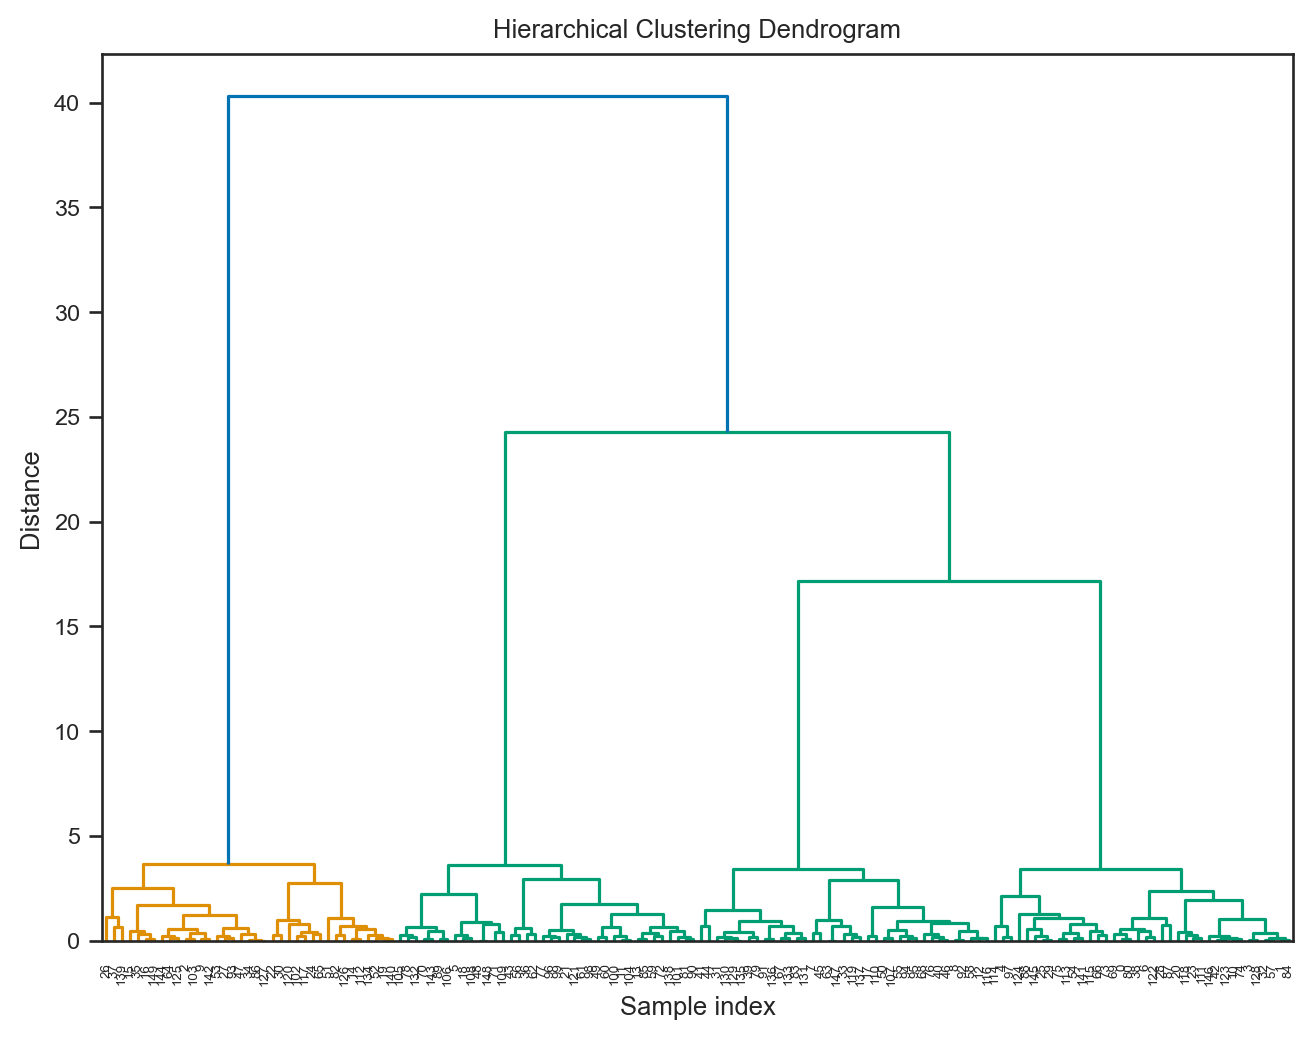

In [7]:
#| echo: false
from sklearn.datasets import make_blobs
sns.set_style('ticks') # setting style
sns.set_context('paper') # setting context
sns.set_palette('colorblind') # setting palette
# Generating synthetic data
X, _ = make_blobs(n_samples = 150, centers = 4, cluster_std = 0.5, random_state = 0)

# Performing hierarchical clustering
Z = linkage(X, 'ward')

# Plotting the dendrogram
plt.figure(figsize = (8, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

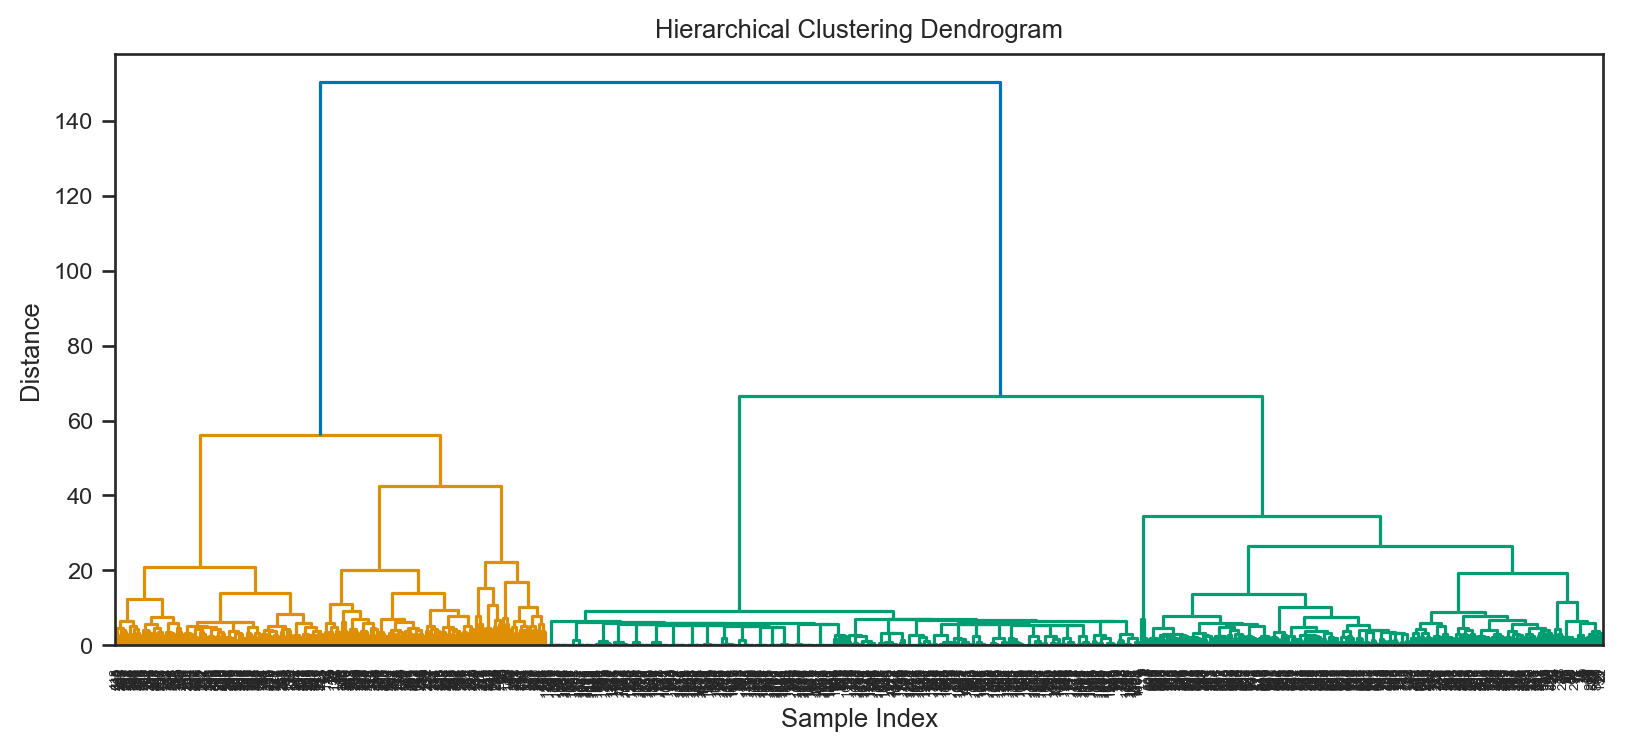

The average silhouette_score for hierarchical clustering is : 0.261


In [8]:
#| code-fold: true
# Apply hierarchical clustering
Z = linkage(mlb_preprocessed, 'ward')

# Plotting the dendrogram for visual inspection
plt.figure(figsize = (10, 4))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# To cut the dendrogram at a determined number of clusters and evaluate performance
max_d = 25  # for example, distance cutoff to define number of clusters
clusters_hc = fcluster(Z, max_d, criterion = 'distance')

# Evaluate clustering performance (example using silhouette score)
silhouette_avg_hc = silhouette_score(mlb_preprocessed, clusters_hc)
print(f"The average silhouette_score for hierarchical clustering is : {silhouette_avg_hc:.3f}")

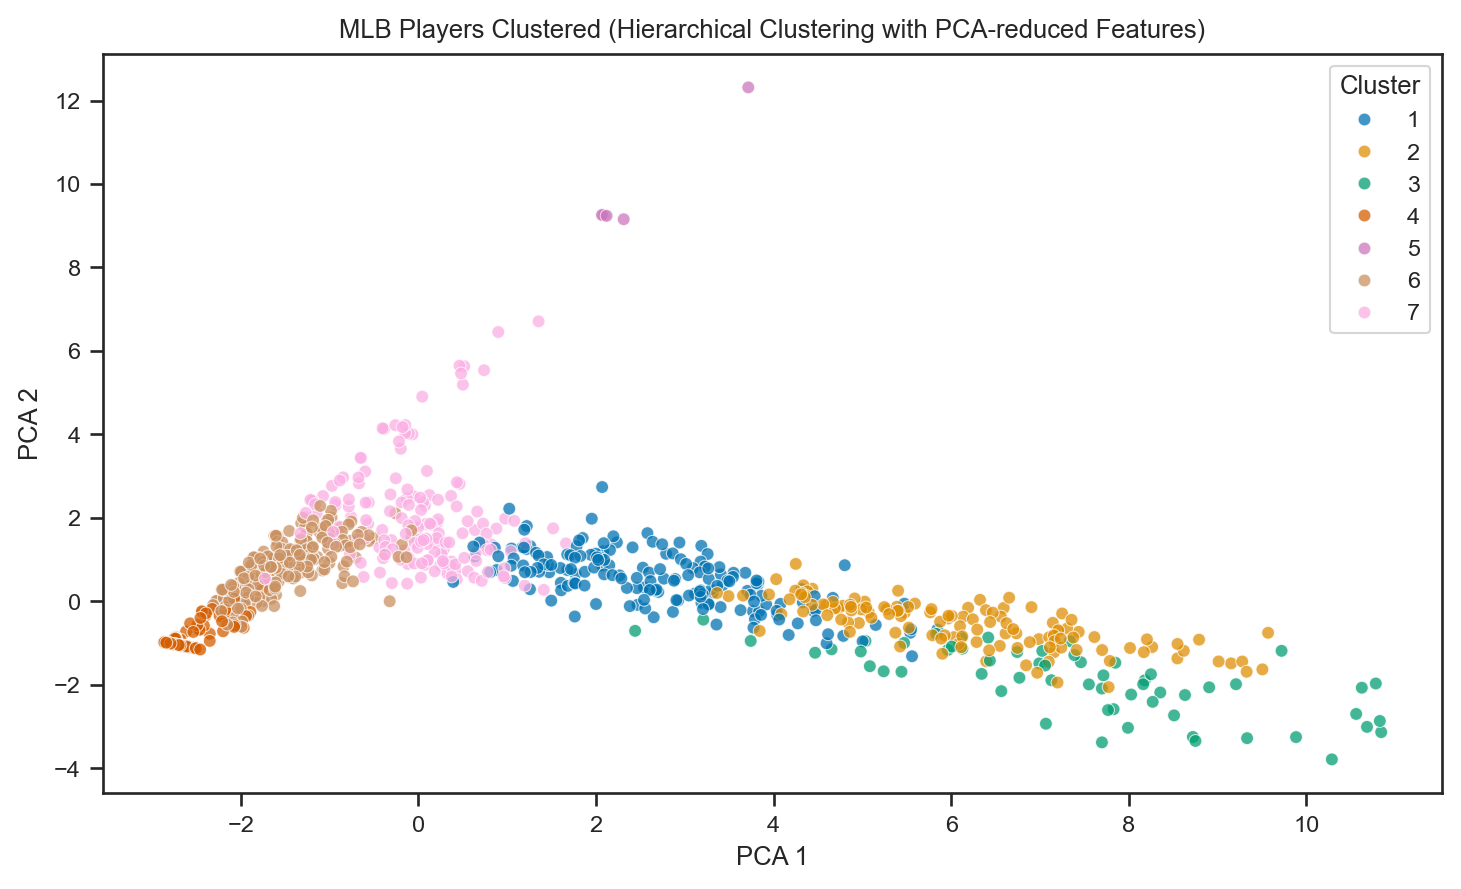

In [9]:
#| code-fold: true

# PCA for dimensionality reduction
pca = PCA(n_components = 2)
mlb_pca = pca.fit_transform(mlb_preprocessed)

# Visualize the clusters
plt.figure(figsize = (9, 5))
sns.scatterplot(x = mlb_pca[:, 0], y = mlb_pca[:, 1], hue = clusters_hc, alpha = 0.75, palette = "colorblind")
plt.title('MLB Players Clustered (Hierarchical Clustering with PCA-reduced Features)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title = 'Cluster')
plt.show()

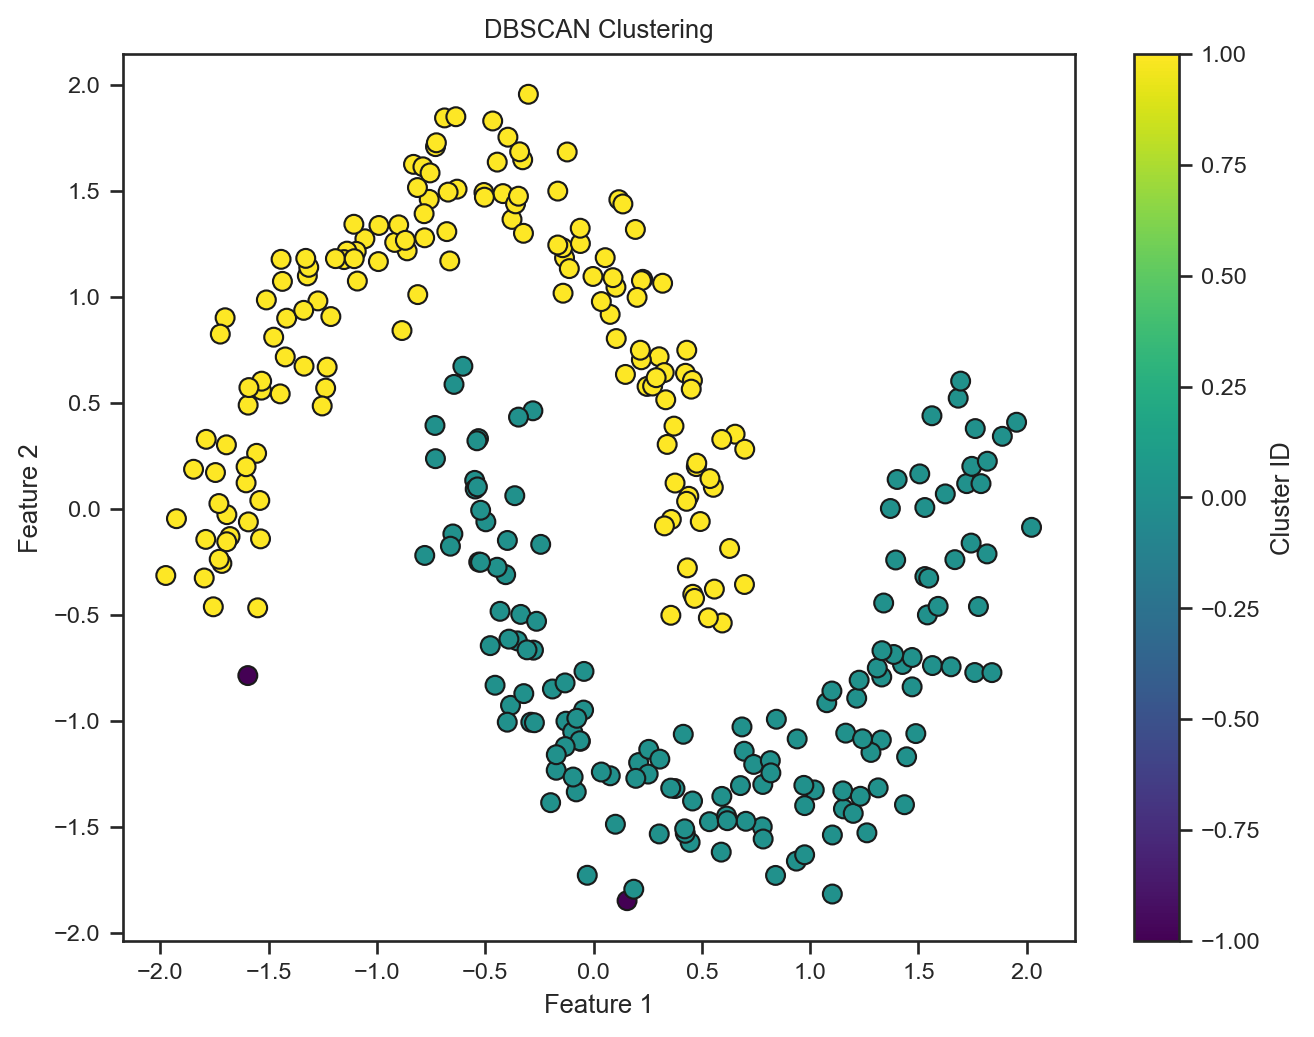

In [10]:
#| echo: false
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset
X, _ = make_moons(n_samples = 300, noise = 0.1, random_state = 42)
X_scaled = StandardScaler().fit_transform(X)  # Standardize features by removing the mean and scaling to unit variance

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps and min_samples chosen based on dataset characteristics
clusters = dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize = (8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters, cmap = 'viridis', marker = 'o', edgecolor = 'k', s = 50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')
plt.show()

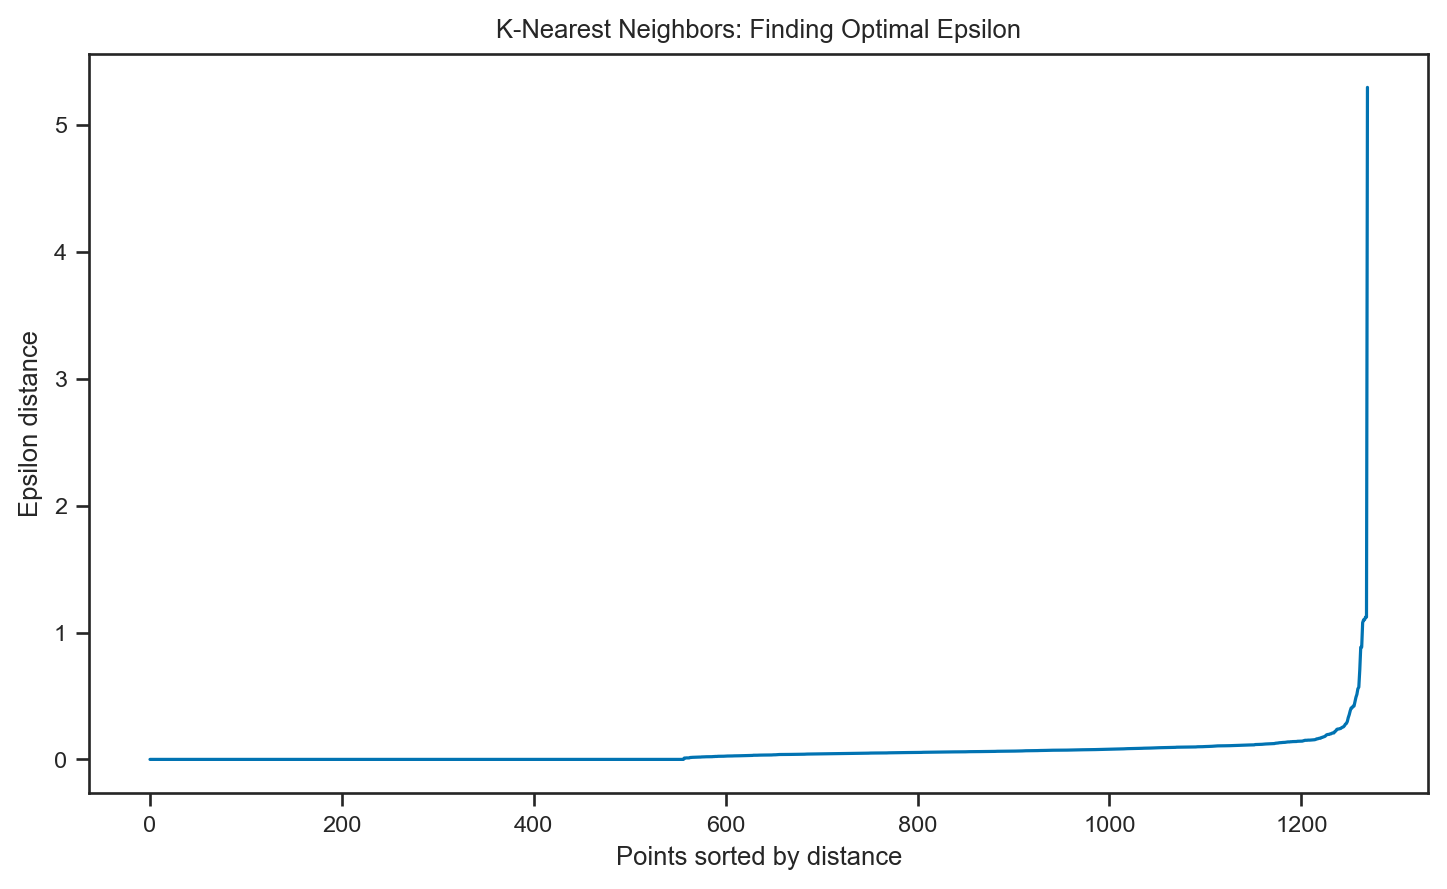

In [11]:
#| code-fold: true
# Selecting relevant features for clustering
features = mlb_players_18[['AVG', 'OBP', 'SLG', 'OPS']]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Finding an optimal eps value using the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize = (9, 5))
plt.plot(distances)
plt.title('K-Nearest Neighbors: Finding Optimal Epsilon')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.show()

In [12]:
# Based on the elbow method from the plot, let's pick an eps value and apply DBSCAN
eps_value = 0.5  # This value should be adjusted based on the elbow point observed in the plot
dbscan = DBSCAN(eps = eps_value, min_samples = 5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Evaluate clustering performance using silhouette score
silhouette_avg_dbscan = silhouette_score(X_scaled, clusters_dbscan)
print(f"The average silhouette_score for DBSCAN is : {silhouette_avg_dbscan:.3f}")

The average silhouette_score for DBSCAN is : 0.060


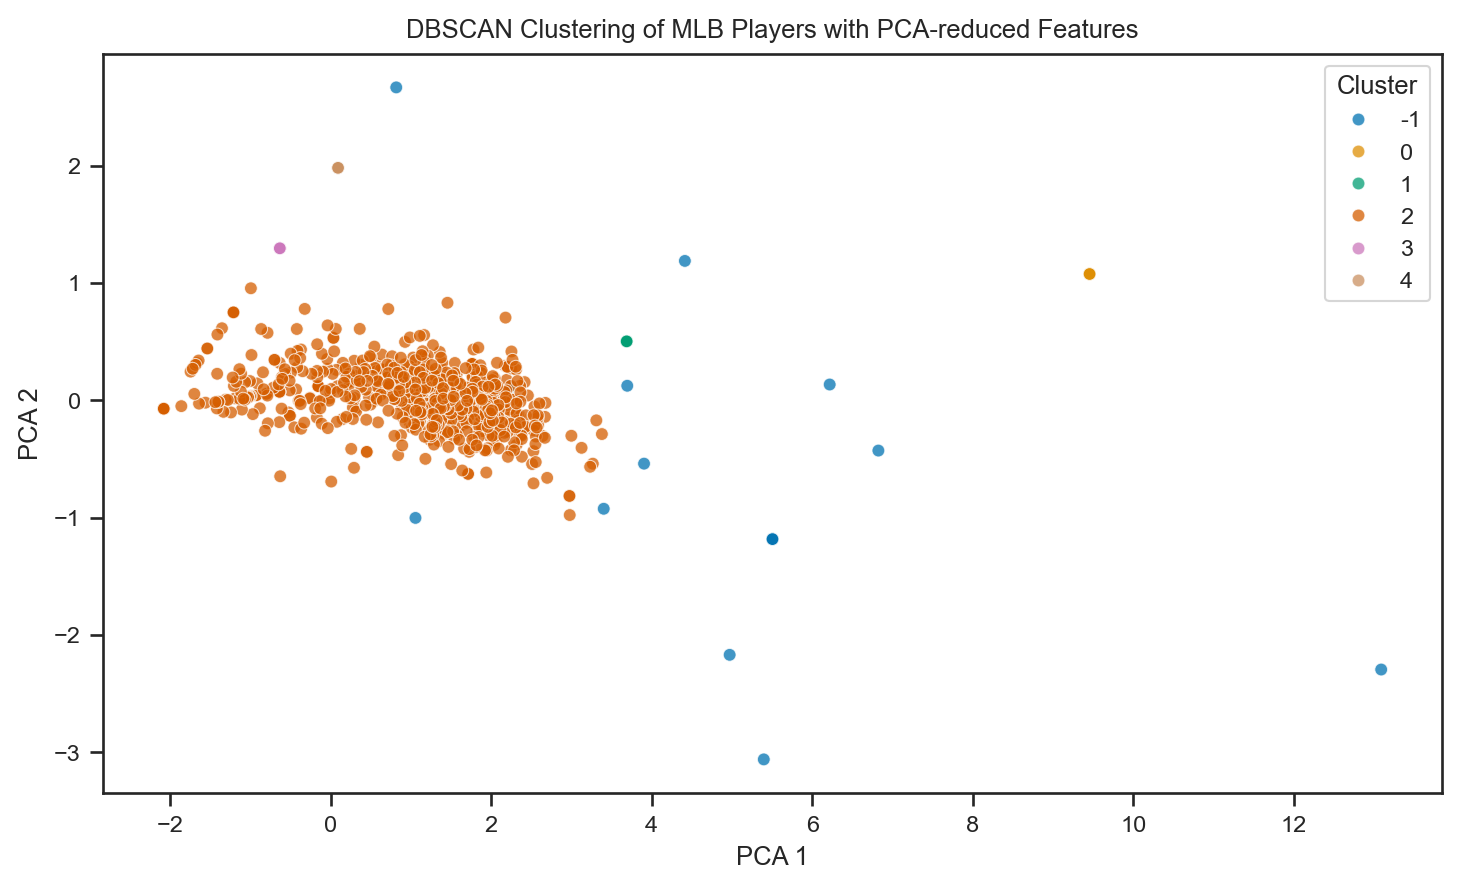

In [13]:
#| code-fold: true

# PCA for dimensionality reduction
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters
plt.figure(figsize = (9, 5))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = clusters_dbscan, palette = "colorblind", alpha = 0.75, legend = "full")
plt.title('DBSCAN Clustering of MLB Players with PCA-reduced Features')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title = 'Cluster')
plt.show()

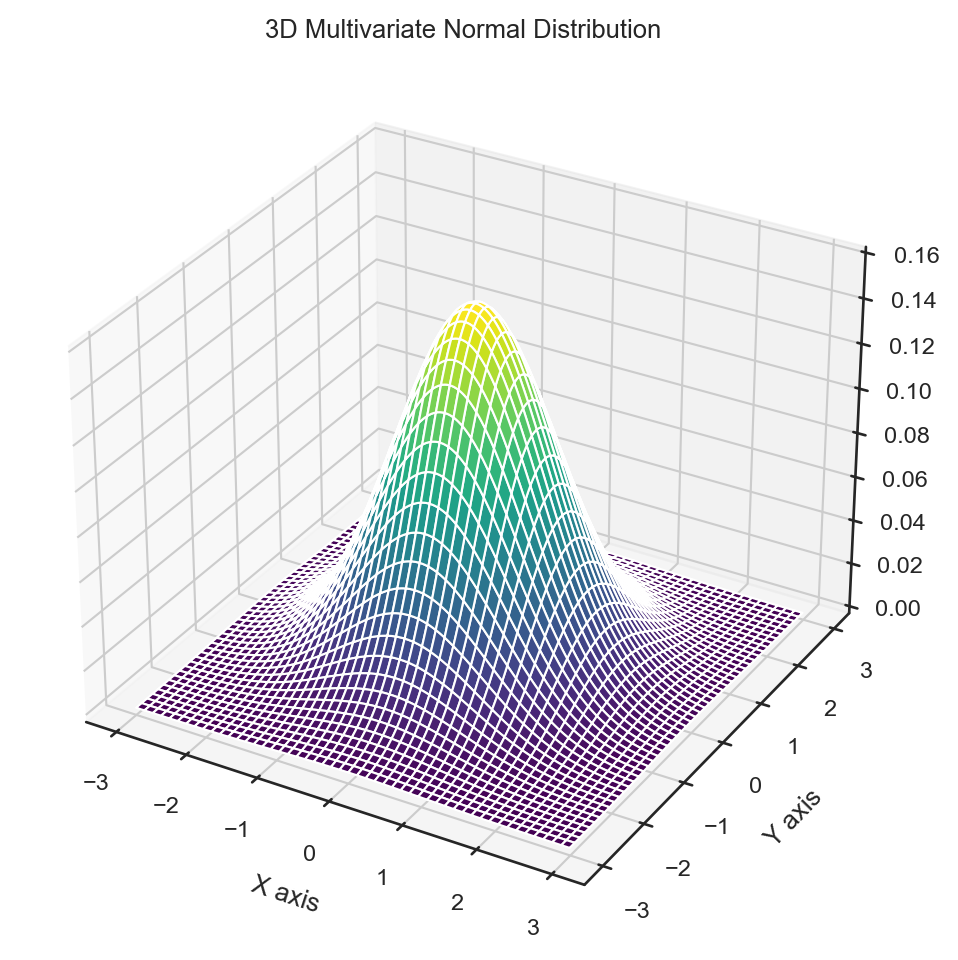

In [14]:
#| echo: false
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Parameters for the multivariate normal distribution
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # Diagonal covariance, for independence

# Create a grid of (x, y) points
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Create the multivariate normal distribution and its PDF
rv = multivariate_normal(mean, cov)
pdf = rv.pdf(pos)

# Plot
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x, y, pdf, cmap = 'viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('3D Multivariate Normal Distribution')

plt.show()

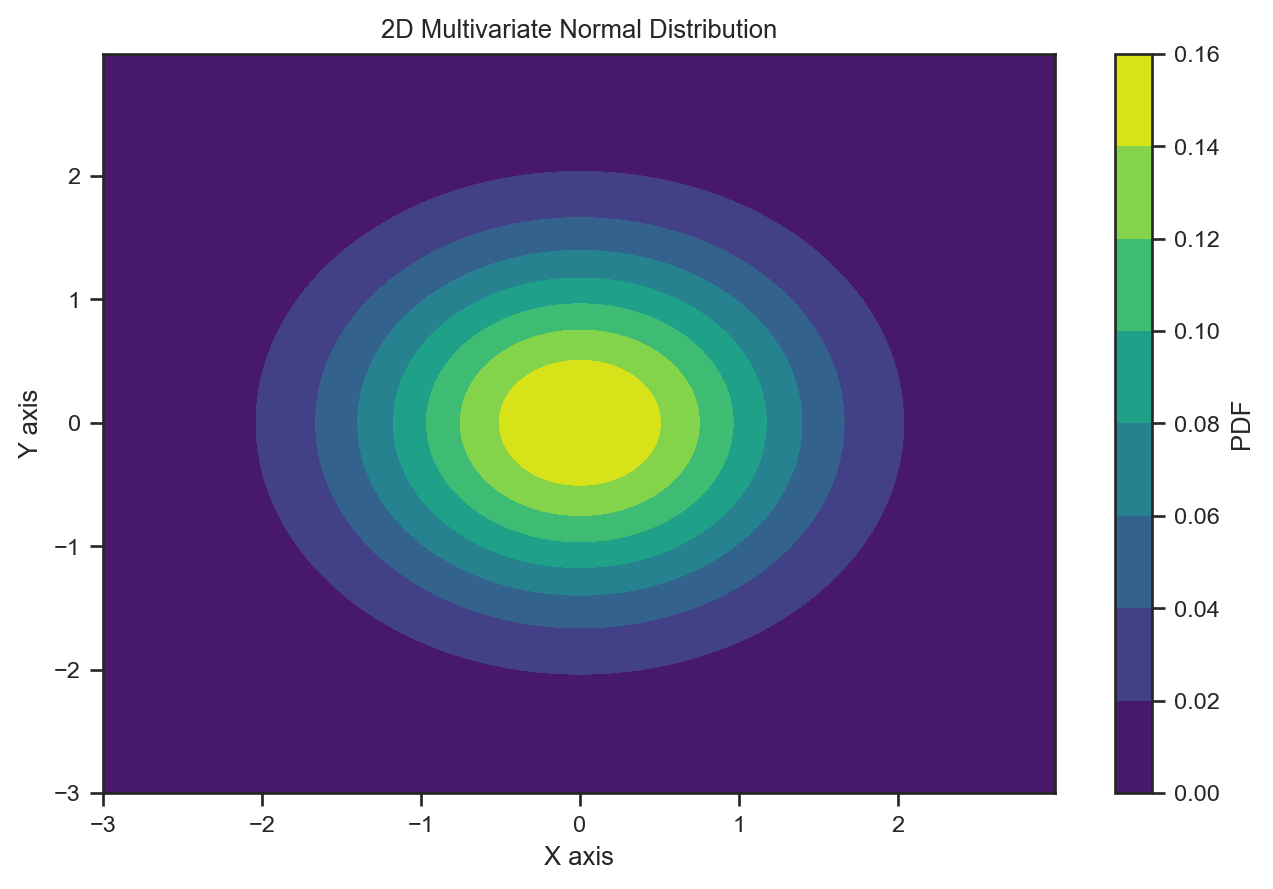

In [15]:
#| echo: false
# Re-import necessary libraries after reset
import numpy as np 
from scipy.stats import multivariate_normal

# Parameters for the multivariate normal distribution
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # Diagonal covariance, for independence

# Create a grid of (x, y) points
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Create the multivariate normal distribution and its PDF
rv = multivariate_normal(mean, cov)
pdf = rv.pdf(pos)

# Generate a 2D version of the multivariate normal distribution plot
fig, ax = plt.subplots(figsize = (8, 5))
contour = ax.contourf(x, y, pdf, cmap = 'viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('2D Multivariate Normal Distribution')

# Adding a colorbar
cbar = fig.colorbar(contour)
cbar.set_label('PDF')

plt.show()

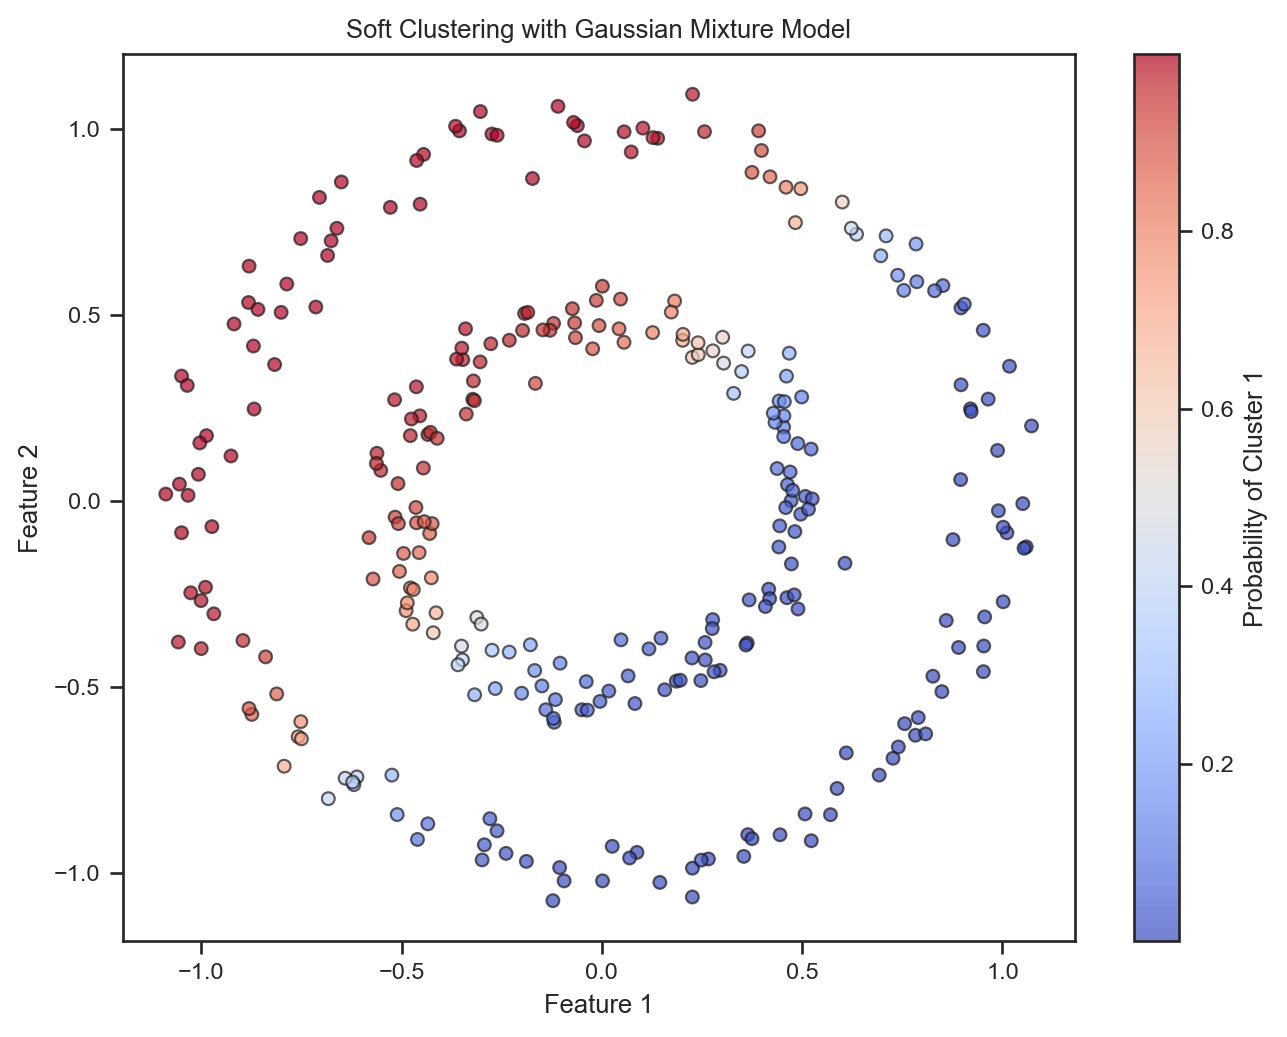

In [16]:
#| echo: false
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_circles

# Generating synthetic data with a non-linear structure
X, _ = make_circles(n_samples = 300, noise = 0.05, factor = 0.5, random_state = 0)

# Fitting Gaussian Mixture Model for soft clustering
gmm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state = 0)
gmm.fit(X)

# Predicting soft assignments
probs = gmm.predict_proba(X)

# Visualizing the data and its soft clustering assignment
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c = probs[:, 0], cmap = 'coolwarm', marker = 'o', edgecolors = 'k', alpha = 0.7)
plt.title('Soft Clustering with Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label = 'Probability of Cluster 1')
plt.show()

In [17]:
#| code-fold: true
# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components = 3, covariance_type = 'full', random_state = 0)
gmm.fit(mlb_preprocessed)

# Predict soft assignments
probs = gmm.predict_proba(mlb_preprocessed)

# Assign each data point to the cluster with the highest probability
hard_assignments = np.argmax(probs, axis=1)

# Calculate the silhouette score using these hard assignments
silhouette_avg = silhouette_score(mlb_preprocessed, hard_assignments)

print(f"The average silhouette score for the GMM clustering is: {silhouette_avg:.3f}")

# BIC
bic_score = gmm.bic(mlb_preprocessed)
print(f"BIC Score: {bic_score:.3f}")

# Convergence
print(f"Converged: {gmm.converged_}")

# Number of iterations
print(f"Number of iterations: {gmm.n_iter_}")

# Cluster weights
print(f"Cluster Weights: {gmm.weights_}")

The average silhouette score for the GMM clustering is: 0.319
BIC Score: -142996.239
Converged: True
Number of iterations: 10
Cluster Weights: [0.48346465 0.24021972 0.27631563]


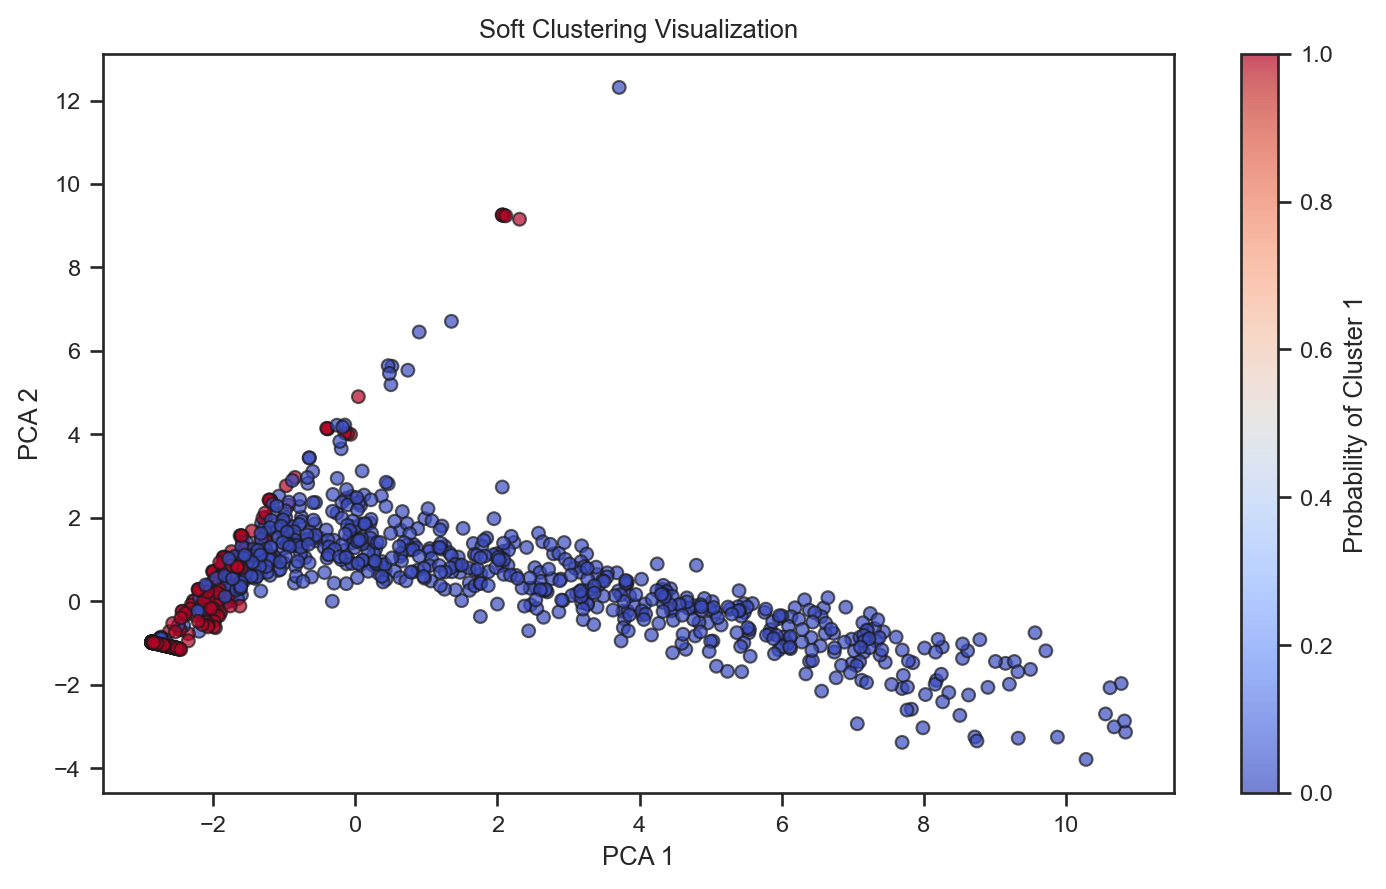

In [18]:
#| code-fold: true
pca = PCA(n_components = 2)
mlb_pca = pca.fit_transform(mlb_preprocessed)

# Choose a cluster to visualize its probability distribution
plt.figure(figsize = (9, 5))
plt.scatter(mlb_pca[:, 0], mlb_pca[:, 1], c = probs[:, 0], cmap = 'coolwarm', edgecolor = 'k', alpha = 0.7)
plt.colorbar(label = 'Probability of Cluster 1')
plt.title('Soft Clustering Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()